# Linear Regression Using Ordinary Least Squares (OLS)

![OLS Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/400px-Normdist_regression.png)

This notebook implements linear regression using the **Ordinary Least Squares (OLS)** analytical solution, which is different from the gradient descent approach. OLS provides a direct mathematical solution to find the optimal parameters.

## Overview
- Load and preprocess the data
- Implement OLS analytical solution
- Implement evaluation metrics (MSE, MAE, R²)
- Train the model and visualize results
- Compare with gradient descent approach

## Mathematical Foundation

### OLS vs Gradient Descent:
- **OLS**: Direct analytical solution using calculus
- **Gradient Descent**: Iterative optimization approach

### OLS Formulas:
The optimal slope and intercept can be calculated directly:

**Slope (m)**: m = Σ[(x - x̄)(y - ȳ)] / Σ[(x - x̄)²]

**Intercept (c)**: c = ȳ - m × x̄

Where x̄ and ȳ are the means of x and y respectively.

## Import Required Libraries

We'll import the necessary libraries for data manipulation and visualization:
- **pandas**: For data loading and DataFrame operations
- **matplotlib.pyplot**: For creating scatter plots and visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

Load the same score dataset used in the gradient descent approach. This allows us to compare the results between OLS and gradient descent methods.

In [3]:
data = pd.read_csv("data/score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Preprocessing

Restructure the data into a convenient format:
- **x**: Hours studied (independent variable)
- **y**: Scores achieved (dependent variable)

In [4]:
data = pd.DataFrame({"x": data["Hours"], "y": data["Scores"]})

data.head()

,x,y
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Ordinary Least Squares (OLS) Implementation

This is the **key difference** from the gradient descent approach. Instead of iteratively optimizing parameters, OLS provides a direct analytical solution.

### The OLS Algorithm:
1. **Calculate means**: x̄ and ȳ
2. **Calculate numerator**: Σ[(x - x̄)(y - ȳ)]
3. **Calculate denominator**: Σ[(x - x̄)²]
4. **Calculate slope**: m = numerator / denominator
5. **Calculate intercept**: c = ȳ - m × x̄

### Advantages of OLS:
- **Exact solution**: No iteration needed
- **Fast computation**: Single calculation
- **Guaranteed optimum**: Always finds the global minimum

### When to use OLS vs Gradient Descent:
- **OLS**: Small datasets, simple linear regression
- **Gradient Descent**: Large datasets, complex models, regularization needed

In [5]:
def linear_regression(data):
    x = data["x"]
    y = data["y"]
    n = len(x)
    y_mean = y.mean()
    x_mean = x.mean()
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2
    m = numerator / denominator
    c = y_mean - m * x_mean
    
    return m, c

## Evaluation Metrics

Implement the same evaluation metrics as the gradient descent approach to compare results:

### 1. Mean Squared Error (MSE)
- Measures average squared prediction error
- Formula: MSE = (1/n) × Σ(y_actual - y_predicted)²

### 2. Mean Absolute Error (MAE)
- Measures average absolute prediction error
- Formula: MAE = (1/n) × Σ|y_actual - y_predicted|

### 3. R-squared (R²)
- Measures proportion of variance explained by the model
- Formula: R² = 1 - (SS_res / SS_tot)

In [6]:
def MSE(a,c, data):
    total_loss = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        predicted_y = a * x  + c
        total_loss += (predicted_y - y) ** 2
    return total_loss / len(data)

In [7]:
def r_squared(m, c, data):
    y_mean = data['y'].mean()
    ss_tot = 0
    for i in range(len(data)):
        y_actual = data.iloc[i]['y']
        ss_tot += (y_actual - y_mean) ** 2
    ss_res = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y_actual = data.iloc[i]['y']
        y_predicted = m * x + c
        ss_res += (y_actual - y_predicted) ** 2
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [8]:
def MAE(m, c, data):
    total_loss = 0
    for i in range(len(data)):
        x = data.iloc[i]['x']
        y = data.iloc[i]['y']
        predicted_y = m * x + c
        total_loss += abs(predicted_y - y)
    return total_loss / len(data)

## Train the Model

Now we'll "train" our model using OLS. Unlike gradient descent, this happens instantly with a single function call!

In [9]:
m,c = linear_regression(data)

## Visualize Results

Let's plot the data points and the regression line found using OLS:

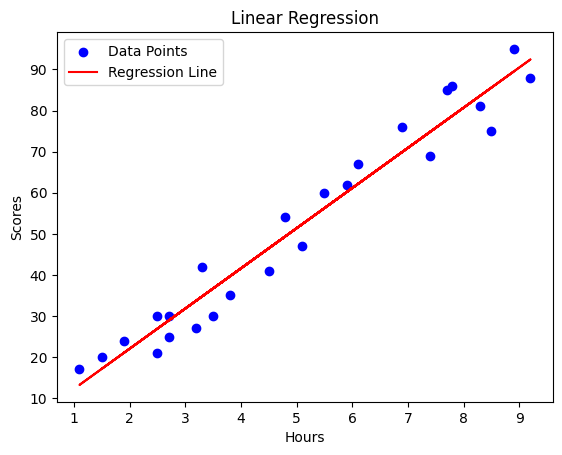

In [10]:
plt.scatter(data["x"], data["y"], color='blue', label='Data Points')
plt.plot(data["x"], m * data["x"] + c, color='red', label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
plt.legend();

## Model Evaluation & Comparison

Let's evaluate our OLS model and see how it compares to the gradient descent approach:

### Expected Results:
- **Same final parameters**: OLS and gradient descent should converge to the same solution
- **Instant computation**: OLS gets the answer immediately
- **Identical performance**: Both methods find the optimal solution

### Key Differences:
| Method | Speed | Scalability | Use Case |
|--------|--------|-------------|----------|
| **OLS** | Instant | Small datasets | Simple linear regression |
| **Gradient Descent** | Iterative | Large datasets | Complex models, regularization |

In [11]:
print(f'Final parameters: m = {m:.6f}, c = {c:.6f}')
print(f'Final model equation: y = {m:.6f} × x + {c:.6f}')
print()
mse = MSE(m, c, data)
rmse = mse ** 0.5
mae = MAE(m, c, data)
r2 = r_squared(m, c, data)
print('Model Performance Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.4f}')

Final parameters: m = 9.775803, c = 2.483673
Final model equation: y = 9.775803 × x + 2.483673

Model Performance Metrics:
Mean Squared Error (MSE): 28.88
Root Mean Squared Error (RMSE): 5.37
Mean Absolute Error (MAE): 4.97
R-squared (R²): 0.9529
